<h1>Importamos librerias</h1>

In [48]:
import pandas as pd

<h1>Cargar data</h1>

In [49]:
insurance = pd.read_csv("insurance.csv")

<h1>Informacion general del dataset</h1>

- **age** Edad del asegurado (en años)
- **sex** Género del asegurado (male/female)
- **bmi** Índice de masa corporal del asegurado (BMI)
- **children** Número de hijos/dependientes cubiertos por el seguro
- **smoker** Indica si el asegurado es fumador (yes/no)
- **region** Región geográfica donde reside el asegurado
- **charges** Cargos del seguro médico pagados por el asegurado

In [50]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
unique_values = insurance['region'].value_counts()
print(unique_values)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [52]:
insurance.info()
#Tenemos 1338 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h1>Encoding de la variable sex</h1
<p> male = 1 female = 0 </p>

In [54]:
insurance['sex'] = insurance['sex'].map({'male': 1, 'female': 0})

<h1>Encoding de la variable smoker</h1>
<p>yes = 1 no = 0</p>

In [55]:
insurance['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})

<h1>Encoding variable region</h1>

In [56]:
# Aplicar codificación one-hot a la columna "region" y convertir los valores a 0 y 1
encoded_region = pd.get_dummies(insurance['region'], prefix='region').astype(int)

# Concatenar las nuevas columnas codificadas al DataFrame original
df_encoded = pd.concat([insurance, encoded_region], axis=1)

# Eliminar la columna original "region" si se desea
df_encoded.drop(columns=['region'], inplace=True)

# Mostrar las primeras filas del DataFrame con las nuevas columnas codificadas
print(df_encoded.head())

   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 0   
4   32    1  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


In [57]:
# Guardar el DataFrame codificado en un nuevo archivo CSV
df_encoded.to_csv('insurance_codificado.csv', index=False)

<h1>Cargar el nuevo dataset con las variables codificadas</h1>

In [58]:
insurance_codificado = pd.read_csv('insurance_codificado.csv')

- **age**: Edad del asegurado (en años)
- **sex**: Género del asegurado (male/female)
- **bmi**: Índice de masa corporal del asegurado (BMI)
- **children**: Número de hijos/dependientes cubiertos por el seguro
- **smoker**: Indica si el asegurado es fumador (yes
- **charges**: Cargos del seguro médico pagados por el asegurado/no)
- **southwest**: Indicador de la región suroeste (0: No, 1: Sí)
- **southeast**: Indicador de la región sureste (0: No, 1: Sí)
- **northwest**: Indicador de la región noroeste (0: No, 1: Sí)
- **northeast**: Indicador de la región noreste (0: Noasegurado

In [59]:
insurance_codificado.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [60]:
insurance_codificado.info()
#Tenemos 1338 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [61]:
insurance_codificado.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


<h1>Análisis exploratorio</h1>

In [62]:
import matplotlib.pyplot as plt

<h1>Distribucion de edad</h1>

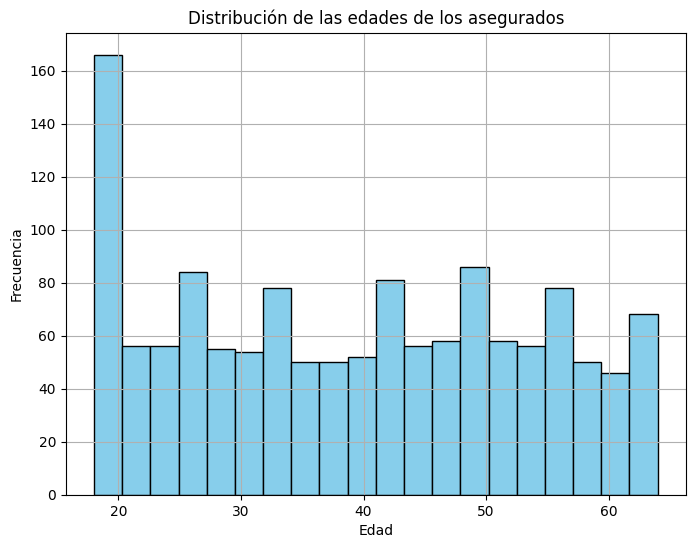

In [63]:
# Visualizar la distribución de las edades
plt.figure(figsize=(8, 6))
plt.hist(insurance_codificado['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de las edades de los asegurados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<h1>Distirbucion de sexo</h1>

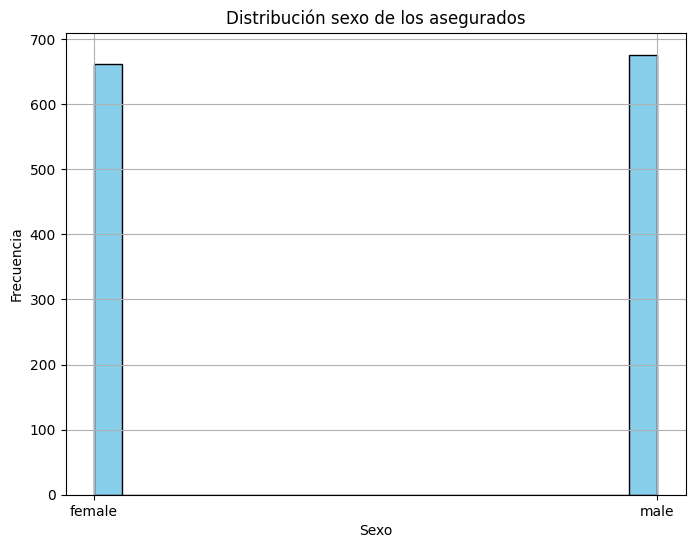

In [64]:
# Visualizar la distribución de las edades
# Definir los valores y etiquetas en el eje x
x_values = [0, 1]  # Los valores de sexo codificados (0 para female, 1 para male)
x_labels = ['female', 'male']  # Etiquetas

plt.figure(figsize=(8, 6))
plt.hist(insurance_codificado['sex'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución sexo de los asegurados')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(x_values, x_labels)  # Establecer los valores y etiquetas en x
plt.grid(True)
plt.show()

<h1>Relacion entre variables y precio</h1>

<h1>Relacion regiones precio</h1>

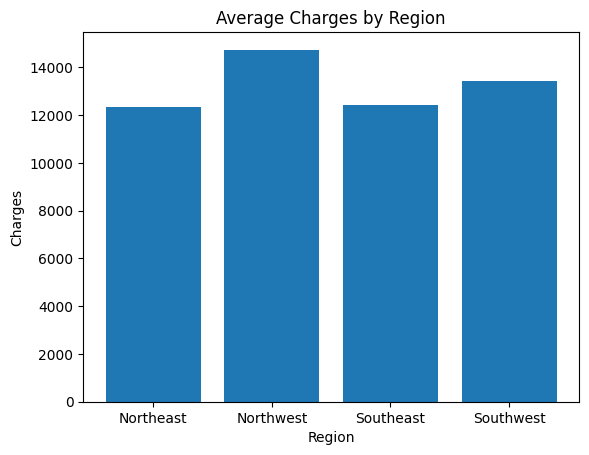

In [65]:
# Calcular los cargos promedio por región
region_charges = insurance_codificado[['charges', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
region_charges_mean = region_charges.groupby(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']).mean()
region_charges_mean.reset_index(inplace=True)

# Graficar los cargos promedio por región
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
charges = region_charges_mean['charges']
plt.bar(regions, charges)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Average Charges by Region')
plt.show()

<h1>Relación entre la edad y los cargos del seguro</h1>

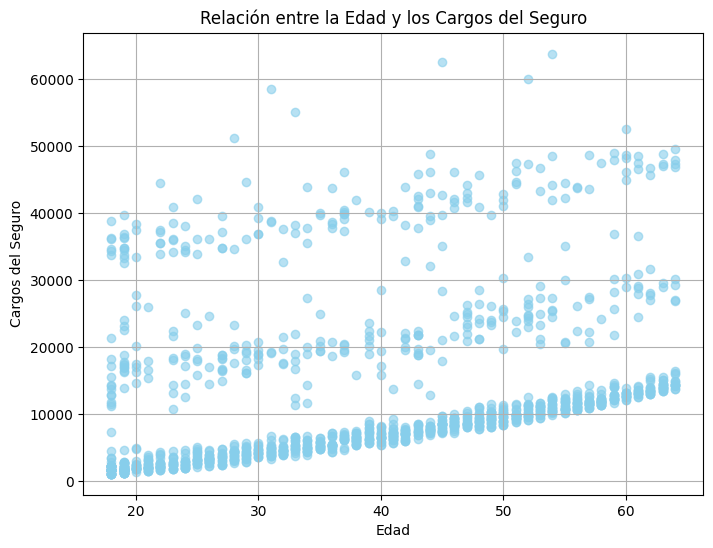

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(insurance_codificado['age'], insurance_codificado['charges'], color='skyblue', alpha=0.6)
plt.title('Relación entre la Edad y los Cargos del Seguro')
plt.xlabel('Edad')
plt.ylabel('Cargos del Seguro')
plt.grid(True)
plt.show()

<h1>Relación entre el número de hijos y los cargos del seguro</h1>

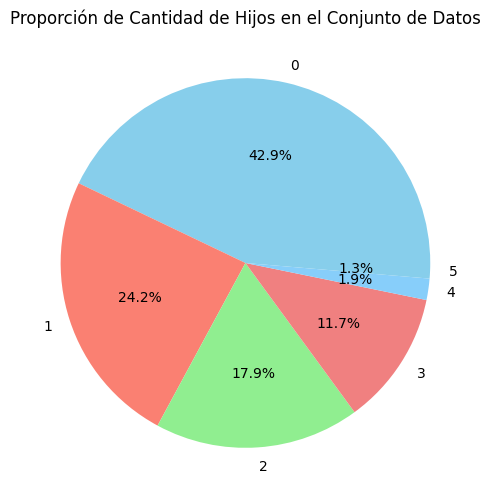

In [67]:
# Contar la cantidad de observaciones para cada categoría de cantidad de hijos
counts = insurance_codificado['children'].value_counts()

# Crear un gráfico de pastel para mostrar la proporción de cada categoría de cantidad de hijos
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proporción de Cantidad de Hijos en el Conjunto de Datos')
plt.show()

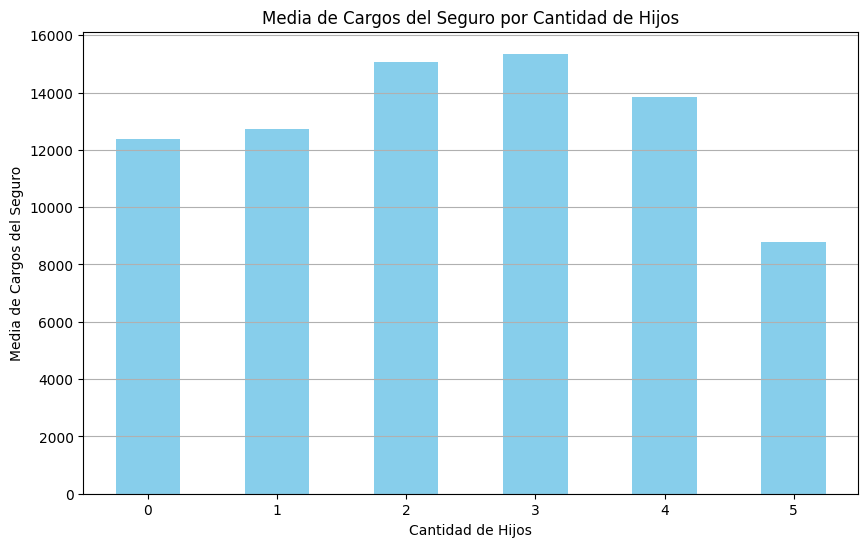

In [68]:
# Calcular la media de los cargos del seguro para cada cantidad de hijos
mean_charges_by_children = insurance_codificado.groupby('children')['charges'].mean()

# Crear el gráfico de barras para mostrar la media de los cargos del seguro por cantidad de hijos
plt.figure(figsize=(10, 6))
mean_charges_by_children.plot(kind='bar', color='skyblue')
plt.title('Media de Cargos del Seguro por Cantidad de Hijos')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Media de Cargos del Seguro')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<h1>Relacion de precio conforme al sexo</h1>

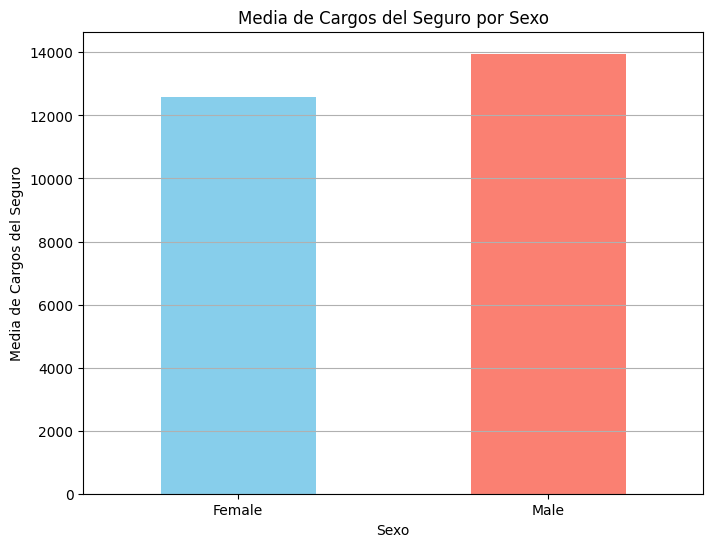

In [69]:
# Calcular la media de los cargos del seguro para cada sexo
mean_charges_by_sex = insurance_codificado.groupby('sex')['charges'].mean()

# Crear el gráfico de barras para comparar la media de cargos entre hombres y mujeres
plt.figure(figsize=(8, 6))
mean_charges_by_sex.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Media de Cargos del Seguro por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Media de Cargos del Seguro')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)  # Etiquetas personalizadas para los valores de sexo
plt.grid(axis='y')
plt.show()

<h1> Relacion con precio con hábito de fumar</h1>

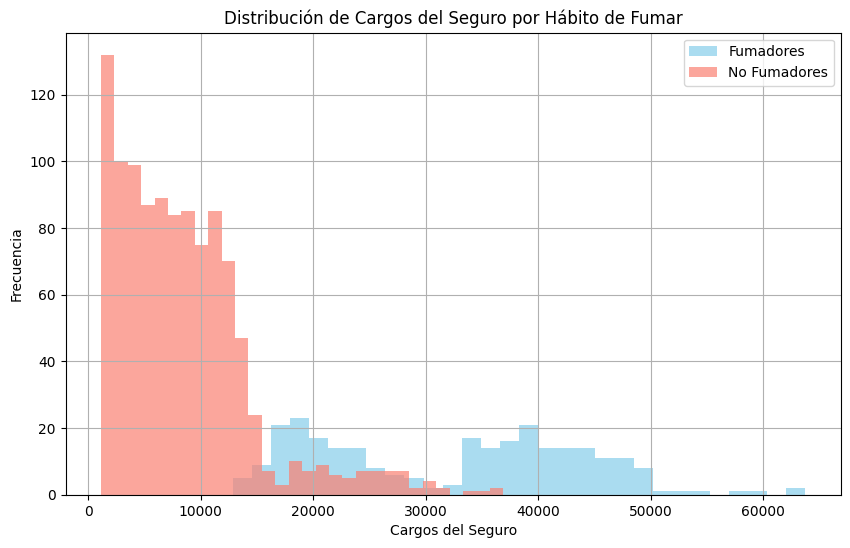

In [70]:


# Filtrar los datos para fumadores y no fumadores
fumadores = insurance_codificado[insurance_codificado['smoker'] == 1]
no_fumadores = insurance_codificado[insurance_codificado['smoker'] == 0]

# Crear los histogramas para comparar los cargos del seguro entre fumadores y no fumadores
plt.figure(figsize=(10, 6))
plt.hist(fumadores['charges'], bins=30, color='skyblue', alpha=0.7, label='Fumadores')
plt.hist(no_fumadores['charges'], bins=30, color='salmon', alpha=0.7, label='No Fumadores')
plt.title('Distribución de Cargos del Seguro por Hábito de Fumar')
plt.xlabel('Cargos del Seguro')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

<h1>Seleccionar la variable objetivo y caracteristicas.</h1>

In [71]:
# Obtener las columnas del DataFrame
insurance_codificado.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [72]:
# Variable objetivo es charges

# Definir la variable objetivo (y) y las características (X)
y = insurance_codificado['charges']


In [73]:
# Las columnas restantes seran las caracterisicas (features)

X = insurance_codificado.drop(['charges', 'region_northeast','region_northwest','region_southeast','region_southwest'],axis=1)

<h1>División de datos para test y entrenamiento</h1>

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)


In [75]:
#Vemos como estan distribuidos los datos.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 5), (402, 5), (936,), (402,))

<h1>Normalizar</h1>

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1>Seleccionamos modelo</h1>

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

<h1>Entrenar modelo</h1>

In [78]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [79]:
#Obtenemos interceptos.

intercept = model.intercept_
intercept

13381.123381602563

In [80]:
#Obtenemos los coeficientes de las caracteristicas

coef = model.coef_
coef

array([3657.45174254,   66.23876821, 1980.08715442,  498.29134162,
       9775.92679773])

<h1>Predecimos con el modelo</h1>

In [81]:
y_pred = model.predict(X_test_scaled)

In [82]:
y_pred

array([ 1.64051119e+04,  6.20437437e+03,  1.01347695e+04,  2.74440096e+03,
        5.11806530e+03,  1.50399789e+04,  1.09909807e+04,  1.15619901e+03,
        7.03221136e+03,  4.56416192e+03,  3.06629809e+04,  3.17125498e+03,
        1.23875591e+04,  5.81905208e+03,  3.21627166e+04,  3.67882127e+04,
        7.44756144e+03,  1.55012393e+04,  1.09543450e+04,  1.54193956e+04,
        3.53915393e+03,  2.93610725e+03,  1.55884229e+03,  9.06614691e+03,
        5.34797074e+03,  2.83566176e+04,  2.72583123e+04,  3.01185213e+04,
        1.67467430e+04,  3.05241402e+04,  3.81639654e+04,  4.72468687e+03,
        1.04316506e+04,  7.38393672e+03,  3.24313907e+04,  3.07068424e+03,
        9.60884478e+03,  2.86145793e+04,  1.24699788e+04,  7.24513986e+03,
        5.71355187e+03,  9.75890474e+03,  3.72446913e+04,  1.09340113e+04,
        1.65351369e+04,  1.36058068e+04,  1.32803986e+04,  4.59835843e+03,
        2.35067049e+03,  3.98371972e+04,  3.37515578e+03,  3.61232743e+04,
        3.16905879e+03,  

<h1>Precision del modelo</h1>

In [83]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [84]:
mae = mean_absolute_error(y_test,y_pred)
mae

4155.97674398541

In [85]:
mape = mean_absolute_percentage_error(y_test,y_pred)
print(mape)

# Para MAPE, evitamos dividir por cero; agregamos un pequeño número al denominador
# Aqui lo escribimos en base a como esta definido el MAPE
mape1 = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10)))

print(mape1)

0.4294463893727367
0.4294463893727244


In [86]:
mse = mean_squared_error(y_test,y_pred)
mse

36723254.91416949

In [87]:
rmse = np.sqrt(mse)
rmse

6059.971527504852

In [88]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared

0.743923636543422

In [89]:
print("MEAN ABSOLUTE ERROR (MAE): ", mae)
print("MEAN SQUARED ERROR (MSE): ", mse)
print("ROOT MEAN SQUARED EROOR (RMSE): ", rmse)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): ", mape)
print("R-SQUARED: ", r_squared)
print("INTERCEPT: ", intercept)
print("COEF: ", coef)

MEAN ABSOLUTE ERROR (MAE):  4155.97674398541
MEAN SQUARED ERROR (MSE):  36723254.91416949
ROOT MEAN SQUARED EROOR (RMSE):  6059.971527504852
MEAN ABSOLUTE PERCENTAGE ERROR (MAPE):  0.4294463893727367
R-SQUARED:  0.743923636543422
INTERCEPT:  13381.123381602563
COEF:  [3657.45174254   66.23876821 1980.08715442  498.29134162 9775.92679773]


In [90]:
# Definir los valores para cada característica
age = 21
sex = 1
bmi = 36
children = 0
smoker = 0


# Combinar las variables en un array de numpy. 
# El orden de las variables debe de coincidir con el modelo
new_data = np.array([[age,sex, bmi, children,smoker]])

# Normalizar los nuevos datos de entrada 
# Utilizando el mismo escalador que se usó para los datos de entrenamiento
new_data_scaled = scaler.transform(new_data)

# Usar el modelo para hacer la predicción con los datos normalizados
new_pred = model.predict(new_data_scaled)

print("La predicción para la nueva entrada es: ", new_pred[0])

La predicción para la nueva entrada es:  4776.950419215269


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h1>Graficar</h1>

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_scaled = scaler.fit_transform(X_test_scaled)
X_train

# Asumiendo X_scaled como tus datos de entrada escalados
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Asumiendo que model es tu modelo de regresión lineal ya entrenado
# Necesitamos predecir los valores de y utilizando los datos originales escalados, no los componentes de PCA
y_pred = model.predict(X_scaled)




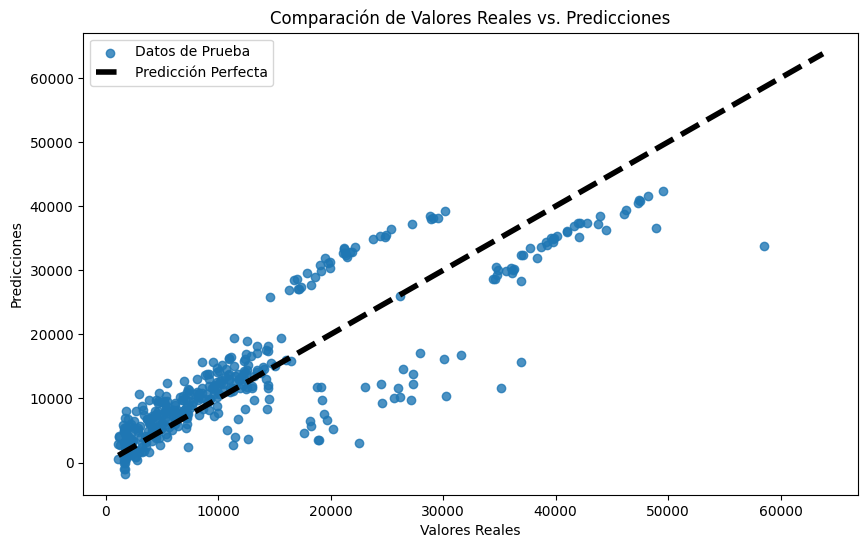

In [92]:
# Generar la gráfica de valores reales vs. predichos

# Configura el tamaño de la figura que contendrá la gráfica.
# Anchi = 10, Alto 6
plt.figure(figsize=(10, 6))

# Creamos gráfico de dispersión con valores reales de prueba (y_test) en el eje x
# Las predicciones del modelo (y_pred) en el eje y 
# alpha lo que hace es que los datos sean ligeramente transparentes.
plt.scatter(y_test, y_pred, alpha=0.8, label='Datos de Prueba')

# Dibuja linea que indicaria donde deberian estar los puntos si predicciones fueran perfectas.
# lw = 4 es el grosor de linea
# 'k--' define que la linea sea punteada
# Los primeros dos parametros son rangos para cada eje.
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.legend()
plt.show()


In [93]:
coefficients = model.coef_

# Calcular la importancia relativa de cada variable en porcentaje
importance = 100 * (abs(coefficients) / abs(coefficients).sum())

# Suponiendo que 'X.columns' contiene los nombres de las variables independientes
variables_importance = pd.DataFrame(importance, index=X.columns, columns=['Importancia (%)'])

# Mostrar la tabla ordenada por importancia
print(variables_importance.sort_values(by='Importancia (%)', ascending=False))

          Importancia (%)
smoker          61.183686
age             22.890554
bmi             12.392588
children         3.118610
sex              0.414562
